In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9):
        super(Model,self).__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,1)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x
    
    

In [3]:
torch.manual_seed(43)
model=Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv(r'D:\priya\BML Datasets\BML Datasets\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data["State"]=data["State"].replace("New York",0.0)
data["State"]=data["State"].replace("California",1.0)
data["State"]=data["State"].replace("Florida",2.0)
data


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94
5,131876.90,99814.71,362861.36,0.0,156991.12
6,134615.46,147198.87,127716.82,1.0,156122.51
7,130298.13,145530.06,323876.68,2.0,155752.60
8,120542.52,148718.95,311613.29,0.0,152211.77
9,123334.88,108679.17,304981.62,1.0,149759.96


In [7]:
x=data.drop(['Profit'],axis=1)
y=data['Profit']
x=x.values
y=y.values
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 2.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 2.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 2.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 2.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 1.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 2.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 1.0000000e+00],
       [1.1994324e+05, 1.5654742e+

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))


In [12]:
x_train=torch.FloatTensor(x_train) #since we have the x values in float datatype
x_test=torch.FloatTensor(x_test)
x_train

tensor([[ 1.0676, -0.5648,  0.6064,  0.0000],
        [ 0.0424, -0.0698,  0.2507,  0.0000],
        [ 0.0204, -0.9250, -0.8326, -1.2247],
        [-0.6721,  1.3135, -0.2180,  0.0000],
        [-0.3394,  1.1222, -1.2909, -1.2247],
        [ 2.0179,  0.5165,  2.0664, -1.2247],
        [-1.2207,  1.2028, -1.8150,  0.0000],
        [-0.0912,  0.1704,  1.0283, -1.2247],
        [-0.4670, -0.7803, -0.1844,  1.2247],
        [ 1.2608, -0.9045,  1.1130, -1.2247],
        [-0.2383,  1.1348, -1.1253, -1.2247],
        [ 0.5549, -1.2120,  0.1229,  0.0000],
        [-1.0739,  0.1394, -0.3026,  1.2247],
        [ 1.9557,  1.0714,  1.8224,  0.0000],
        [ 0.0509,  1.1632,  0.5605, -1.2247],
        [ 1.7486, -0.8535,  1.5076,  1.2247],
        [-1.3716,  0.1519, -1.7520, -1.2247],
        [-0.6815, -1.4704, -0.2642, -1.2247],
        [-0.1947, -0.6770,  0.6046,  1.2247],
        [-1.0719, -0.1867, -0.5506,  0.0000],
        [ 0.5830, -0.4915, -0.0572,  1.2247],
        [-0.0485, -0.0244,  0.5919

In [13]:
y_train = torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)
y_train

tensor([[ 0.8976],
        [ 0.3168],
        [-0.1538],
        [-0.4558],
        [-0.4362],
        [ 1.9821],
        [-1.2599],
        [-0.2442],
        [-0.4541],
        [ 1.0821],
        [-0.3463],
        [ 0.7573],
        [-0.6090],
        [ 1.9701],
        [-0.0833],
        [ 1.9512],
        [-1.1435],
        [-0.4618],
        [-0.1491],
        [-0.9272],
        [ 0.8048],
        [-0.1078],
        [ 0.2472],
        [-2.5488],
        [ 0.0994],
        [ 1.0505],
        [-1.0992],
        [ 0.4599],
        [-0.2882],
        [-0.8509]])

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 # Example with a learning rate of 0.001


In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=1, bias=True)
)>

In [16]:
from torch.utils.data import DataLoader,TensorDataset
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [17]:
# Training loop
epochs = 1000
loss_values=[]
for epoch in range(epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update weights
    loss_values.append(loss.detach().item())
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0360
Epoch [200/1000], Loss: 0.0148
Epoch [300/1000], Loss: 0.0090
Epoch [400/1000], Loss: 0.0033
Epoch [500/1000], Loss: 0.0029
Epoch [600/1000], Loss: 0.0027
Epoch [700/1000], Loss: 0.0026
Epoch [800/1000], Loss: 0.0026
Epoch [900/1000], Loss: 0.0025
Epoch [1000/1000], Loss: 0.0027


Text(0.5, 0, 'Epochs')

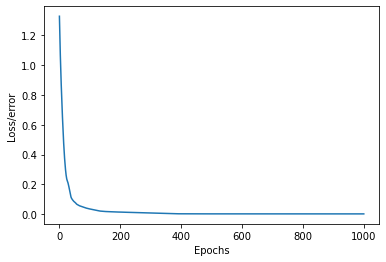

In [18]:
plt.plot(range(epochs),loss_values)
plt.ylabel("Loss/error")
plt.xlabel("Epochs")

In [21]:
with torch.no_grad():#to turn off the back propogation in order to test the model
    y_eval=model.forward(x_test)
    loss=criterion(y_eval,y_test)
    

In [22]:
loss

tensor(8.4382e+09)

In [23]:

# Example without scaling
new_data_tensor = torch.tensor([[165349.20, 136897.80, 471784.10, 0.0]], dtype=torch.float32) #for country NewYork

model.eval()
with torch.no_grad():
    prediction = model(new_data_tensor)
    print(f"Predicted Profit: {prediction.item():.2f}")


Predicted Profit: 151612.45
